### TODOS:
* What criteria should I use to get relevant documents?
* LDA/Topic modelling

In [1]:
from data.data import Delpher, DBNL
import matplotlib.pyplot as plt
import spacy
from collections import Counter
import pickle
import nltk
from nltk.text import Text
import pandas as pd

## Analysis of verbs

In [2]:
nlp = spacy.load("nl_core_news_sm", disable=['parser', 'ner'])

In [2]:
# years = [1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815]
years = [1809, 1810, 1811, 1812, 1813, 1814]
# years = list(set(delpher.dataset["Year"]))

In [3]:
delpher = Delpher().dataset.filter(lambda example: example["Year"] in years)
dbnl = DBNL().dataset.filter(lambda example: example["Year"] in years)

In [4]:
datasets = [["Delpher", delpher], ["DBNL", dbnl]]

In [5]:
print(datasets)

[['Delpher', Dataset({
    features: ['Year', 'Month', 'Day', 'Newspaper', 'Path', 'Title', 'Text', 'CleanedText'],
    num_rows: 28050
})], ['DBNL', Dataset({
    features: ['Year', 'Text', 'Path', 'CleanedText'],
    num_rows: 1020
})]]


In [9]:
datasets[0][1]["CleanedText"]

['tt^Eni)A3r det, 3i December 1808. B\'^sTeni:^!" krkl.^  * a4sten en gen, als: aand, zijn gedaan de navolgende henoerain Van den Heej r _ y , . gewonen dienst fV\'J2\' Lfmi^*<&i Staats-Raad in buitender kobnicn , tl _"_ Commissaris-Directeur van het etablissement \' " Middelburg.  Van den Heet t* ._ ii Het etablissement lMf^rt Wrdbuder , tot Commissaris van  " er kolomen, te Rotterdam. Van den Hee r zr ir en-Chef der sai_ \' "na?\' S\'Pensionercl Kwarticrmeesterüvisie van liet \' -tot Jef Va" het eerste bureau der tweede "tl ministerie vaii oo>log. \n alle zoodaifie >.C\\nantlen brenSt\' < mede, ter bmnissevan \'Zyne Maiè_t?it *n-?kten <"V\'.mder pewonen, aan welken door eenige VS ƒ "\' f \'\' Ve-Wg Zal worden, toegekend reqaestenJ do  o ven* de OP zesek\' vin *Cn\' beko,nlnS v^ concessie, "4\'Me"c i-even^ 10i?\'  wel .p anfere hoogere zegels, gaande he S:tan bIJ de f* *" * ?^Fd*# lB3 , aannige bii dfwï t ?gelS Vor re^te. tt verkrijging van derel hitu toe6*st" remissien of vrijdommen,

In [7]:
def get_count_over_time(verb_year_l, verbs):
    # TODO: get norm values
    
    counts = [Counter([x[0] for x in verb_year_l if x[1] == year]) for year in years]
    
    for count in counts:
        total = sum(count.values(), 0.0)
        for key in count:
            count[key] = (count[key]/total) * 100
            
    ys = [[count[verb.lower()] for count in counts] for verb in verbs]
    for y, verb in zip(ys, verbs):
        plt.plot(years, y, label=verb.lower())
        print(y, verb)
    plt.legend()
    plt.ylabel("norm occurences (wrt year)")
    plt.xlabel("Years")
    plt.title("Verb (lemma) occurences over time")
    plt.show()
    
def plot_instances(datasets_l):
    fig, axes = plt.subplots(int(len(datasets_l)/2), 2, figsize=(10, 4))
    axes = axes.flatten()
    idx=0
    for dataset in datasets_l:
        group = [len(dataset[1].filter(lambda example: example["Year"] == x)) for x in years]
        axes[idx].bar(years, group, color='blue')
        axes[idx].set_title(dataset[0])
        axes[idx].set_xlabel("Years")
        idx+=1
    fig.supylabel("# of segments")
    plt.tight_layout()
    plt.show()

def get_verbs(dataset):
    verbs_all = []
    years_all = []
    curr_year = ""
    prev_year = ""
    
    for data in dataset:
        curr_year = data["Year"]
        if not prev_year:
            prev_year = data["Year"]
            print(f"On year: {curr_year}")
        if curr_year != prev_year:
            print(f"On year: {curr_year}")
        doc = nlp(data["CleanedText"])
        verbs = [x.lemma_.lower() for x in doc if x.pos_ == "VERB"]
        verbs_all.extend(verbs)
        years_all.extend([data["Year"]]*len(verbs))
        prev_year = curr_year
        
    return [[v, y] for v, y in zip(verbs_all, years_all)]

def plot_verbs(verb_year):
    fig, axes = plt.subplots(6, 1, figsize=(40, 35))
    # axes = axes.flatten()
    
    idx = 0
    
    for year in years:
        verb_subset = Counter([x[0] for x in verb_year if x[1] == year])
        counter = verb_subset.most_common(100)
        y = [count for tag, count in counter]
        x = [tag for tag, count in counter]
        axes[idx].bar(x,y)
        axes[idx].set_title(year)
        axes[idx].tick_params(axis='x', labelrotation=45)
        idx+=1

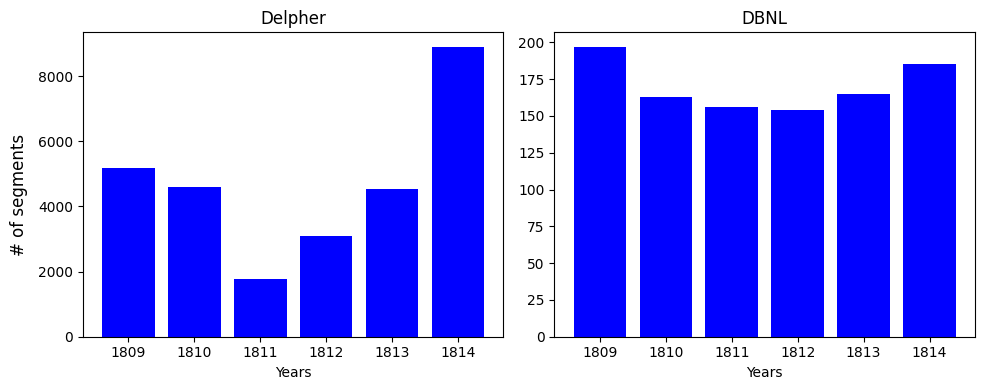

In [8]:
plot_instances(datasets)

In [9]:
# verb_year_dbnl = get_verbs(datasets[1][1])

In [10]:
# verb_year_delpher = get_verbs(datasets[0][1])

In [11]:
# with open('verbs_dbnl.pkl', 'wb') as f:
#     pickle.dump(verb_year_dbnl, f)
#     
# with open('verbs_delpher.pkl', 'wb') as f:
#     pickle.dump(verb_year_delpher, f)

In [12]:
with open('verbs_dbnl.pkl', 'rb') as f:
    verb_year_dbnl = pickle.load(f)
    
with open('verbs_delpher.pkl', 'rb') as f:
    verb_year_delpher = pickle.load(f)

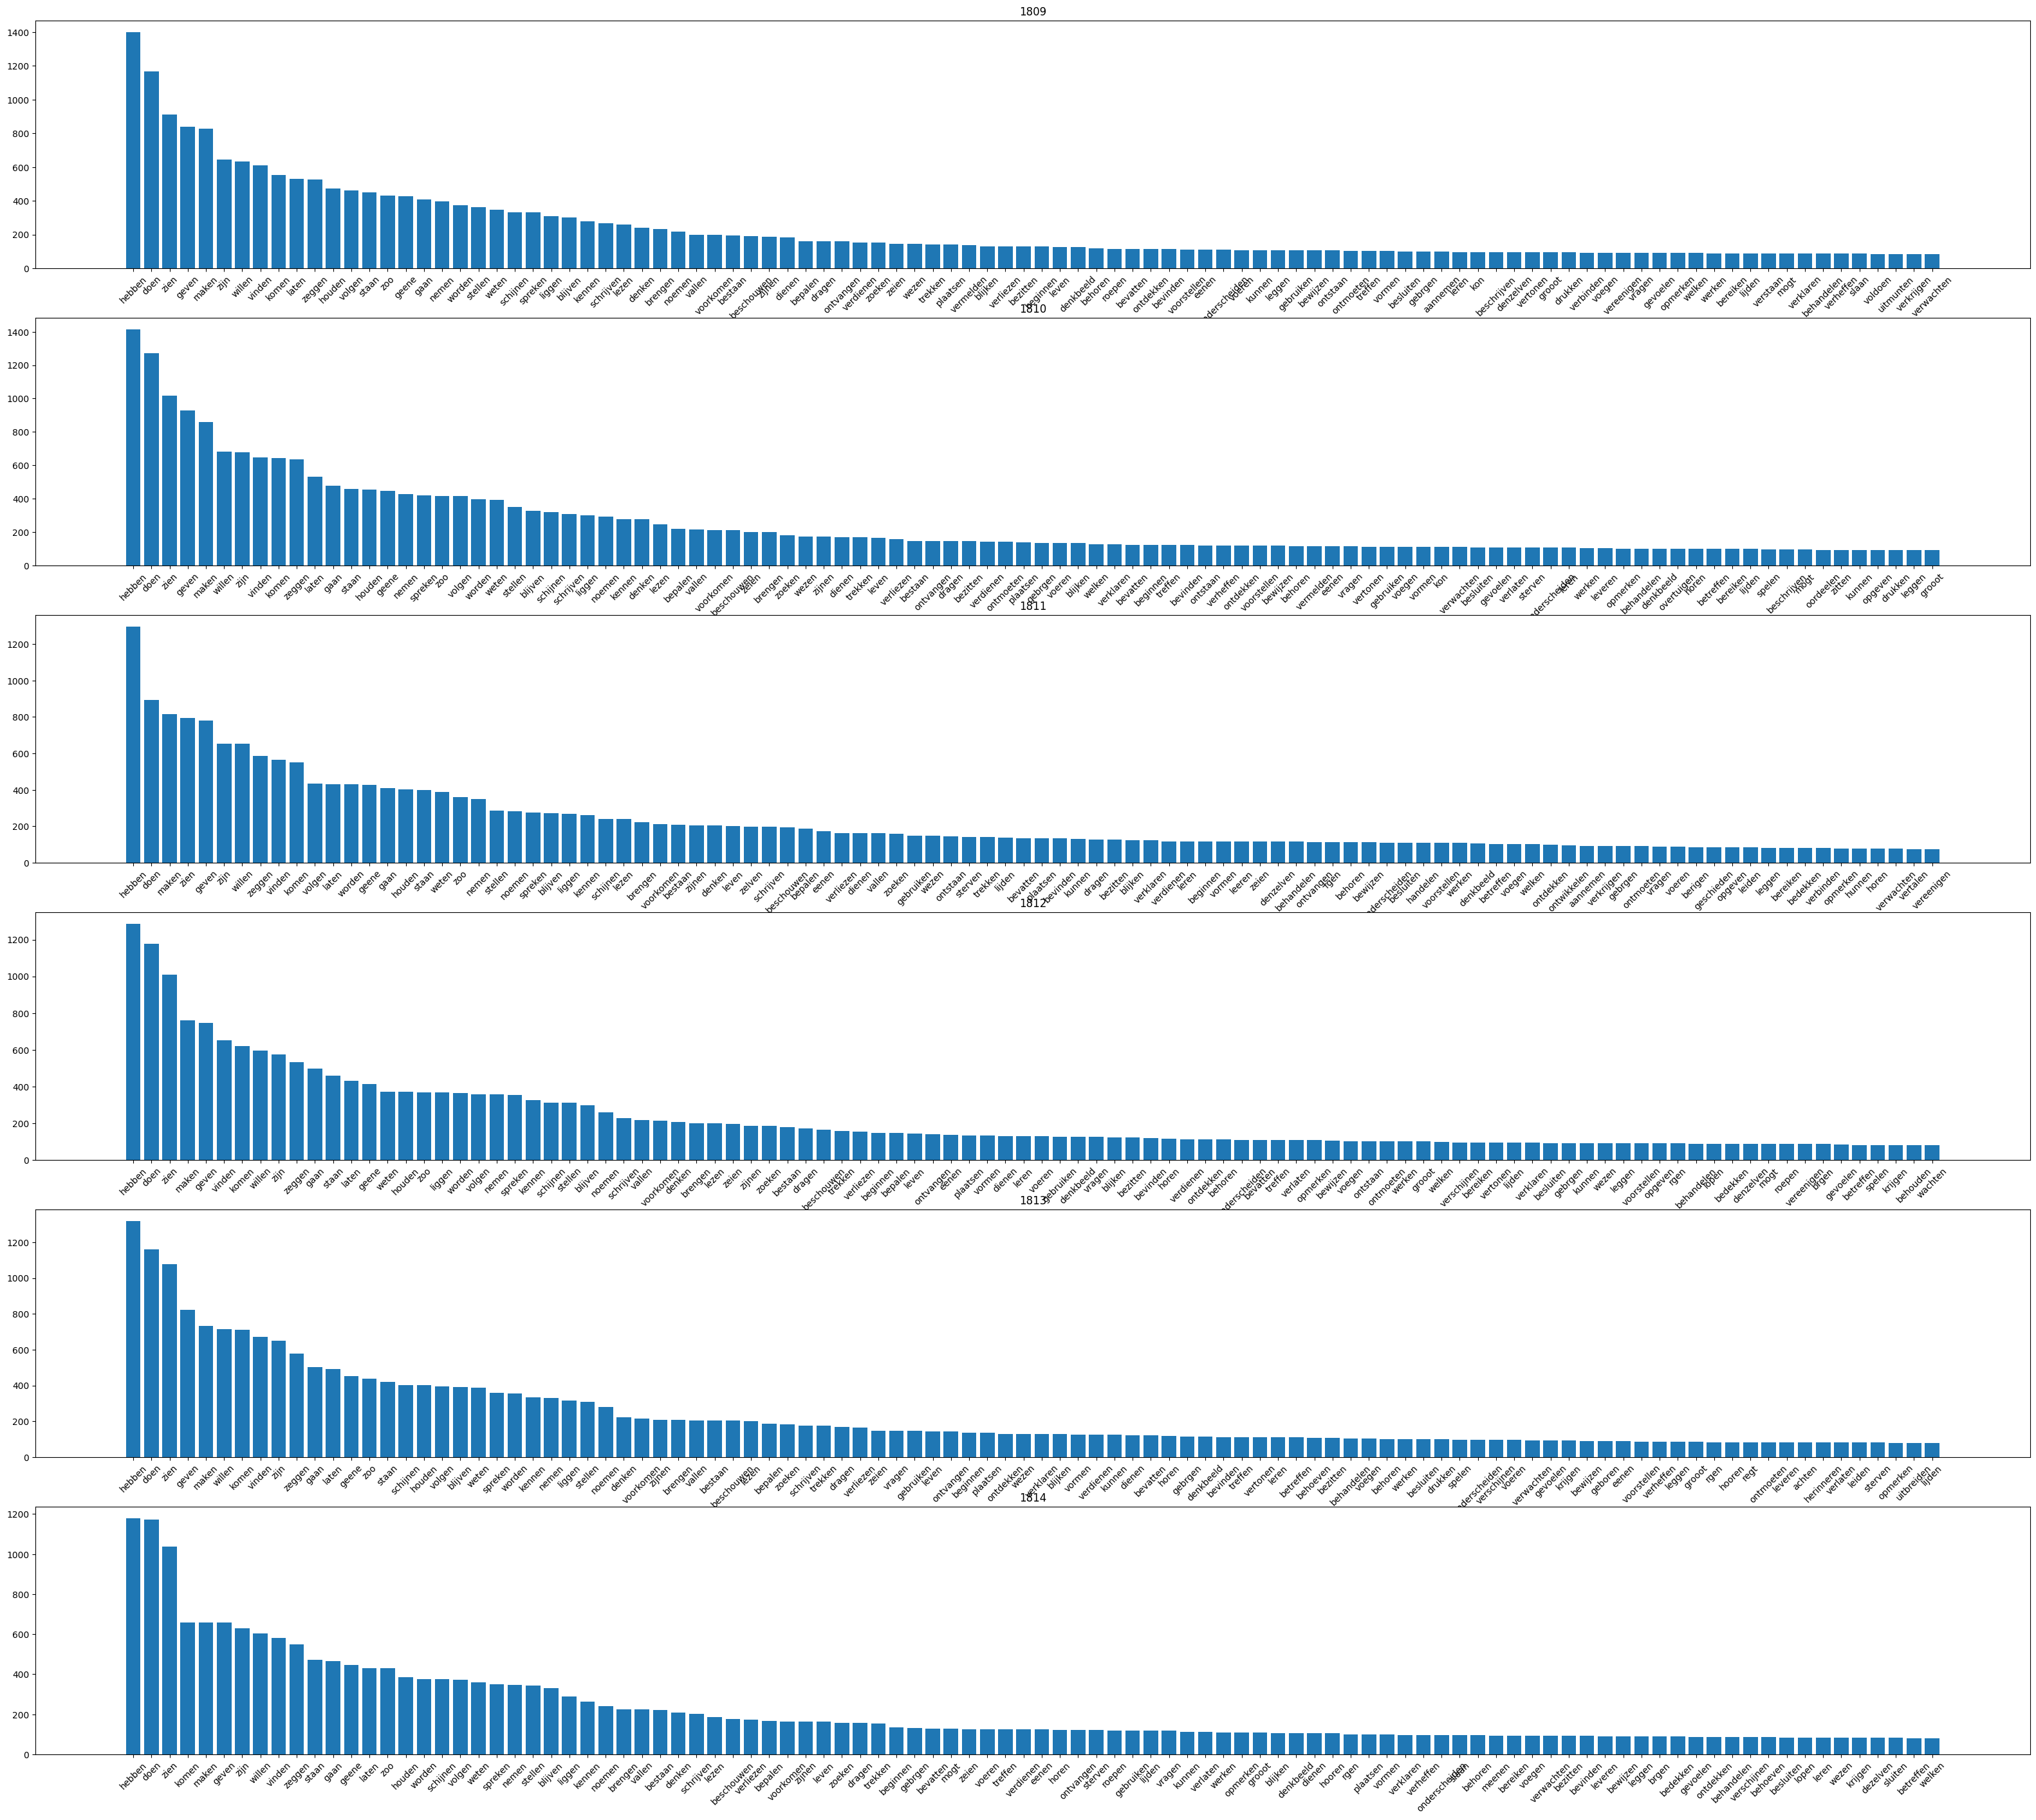

In [13]:
plot_verbs(verb_year_dbnl)

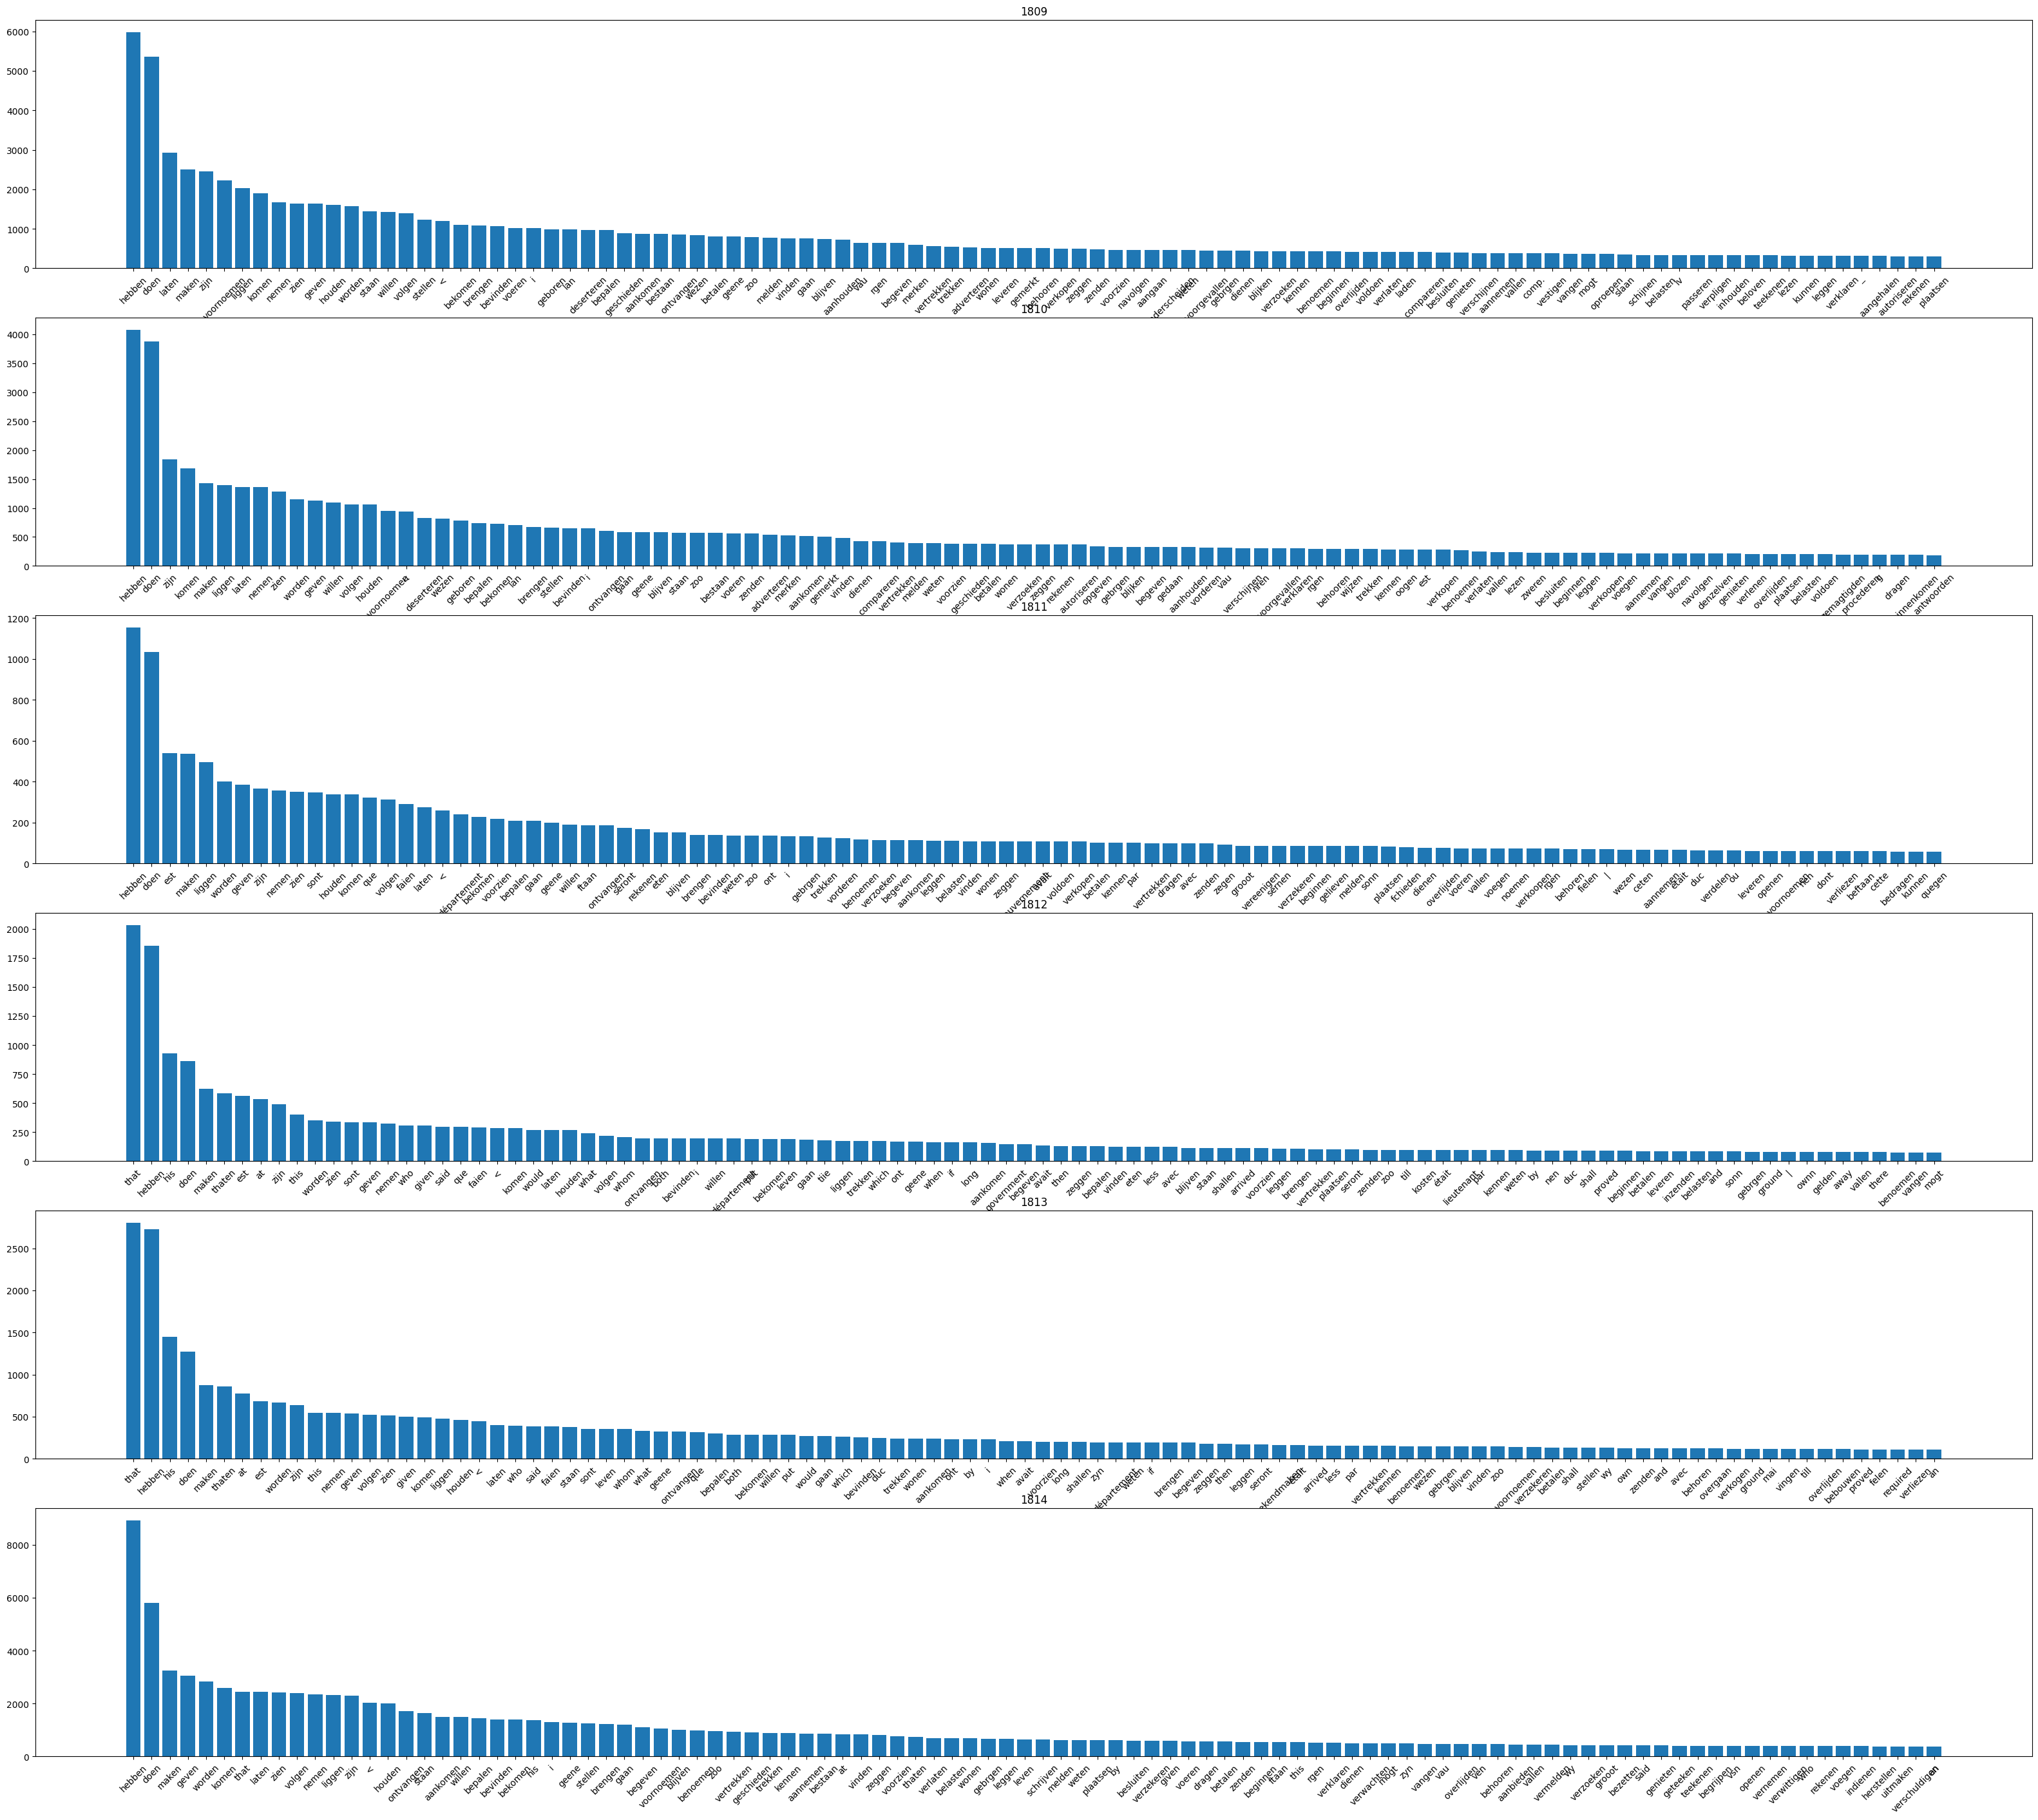

In [14]:
plot_verbs(verb_year_delpher)

[0.14134043322486278, 0.19950914416910775, 0.21600184132717198, 0.16136507991004756, 0.2114898468350875, 0.1616855299784975] verklaren
[0.01314794727673142, 0.01108384134272821, 0.014164055168994882, 0.02918304636671073, 0.011565850998793847, 0.013334889070391544] verzetten
[0.16434934095914275, 0.17259124376533924, 0.1929852516775553, 0.15793178033749333, 0.16687870726831122, 0.14168319637291016] besluiten


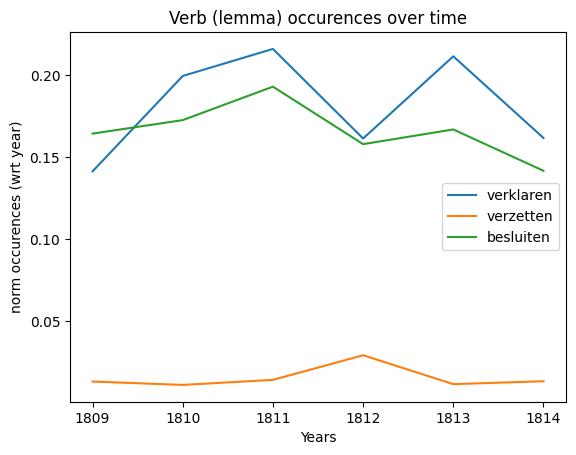

In [15]:
get_count_over_time(verb_year_dbnl, ["verklaren", "verzetten", "besluiten"])

[0.13362695184850618, 0.17699115044247787, 0.11335802918969251, 0.07637131433534494, 0.09111970609047992, 0.14823317019994176] verklaren
[0.00999080013820607, 0.0117212682412237, 0.006072751563733527, 0.007487383758367151, 0.0029080757262919124, 0.008940132833070416] verzetten
[0.16484820228040012, 0.13479458477407255, 0, 0.020964674523428022, 0.044590494469809325, 0.17072769797347376] besluiten


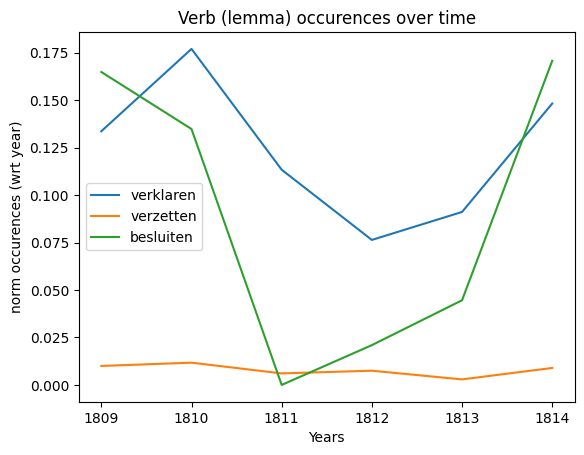

In [16]:
get_count_over_time(verb_year_delpher, ["verklaren", "verzetten", "besluiten"])

## Concordances

In [27]:
keywords = ["keizer", "koning", "Napoleon"]
concordances = []

for data in datasets[0][1]:
    sample_text = Text(nltk.word_tokenize(data["CleanedText"]))
    temp = []
    for keyword in keywords:
        x = sample_text.concordance_list(keyword)
        # print(x)
        temp.append(len(x))
    temp.append(data["Year"])
    concordances.append(temp)

keywords.append("Year")

<Axes: xlabel='Year'>

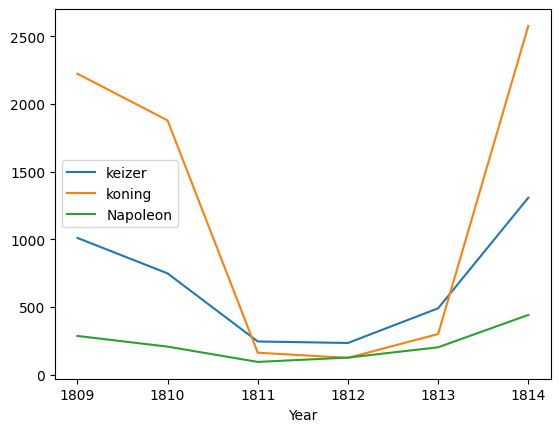

In [28]:
pd.DataFrame(concordances, columns=keywords).groupby("Year").sum().plot()

In [29]:
keywords = ["keizer", "koning", "Napoleon"]
concordances = []

for data in datasets[1][1]:
    sample_text = Text(nltk.word_tokenize(data["CleanedText"]))
    temp = []
    for keyword in keywords:
        x = sample_text.concordance_list(keyword)
        temp.append(len(x))
    temp.append(data["Year"])
    concordances.append(temp)

keywords.append("Year")

<Axes: xlabel='Year'>

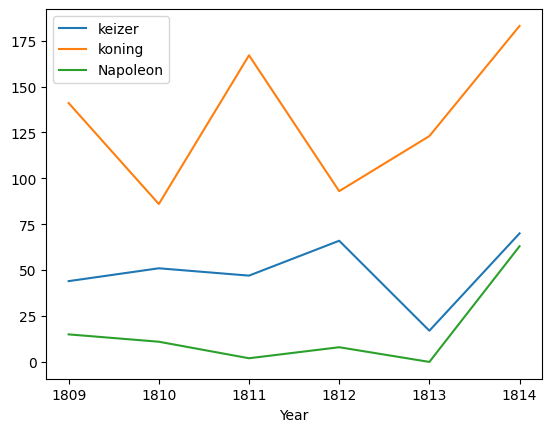

In [30]:
pd.DataFrame(concordances, columns=keywords).groupby("Year").sum().plot()

## Test of summarization as a task